In [384]:
import pandas as pd
import numpy as np
import re

### Read data
Read the generic_tweets.csv into the dataframe df.<br>
Read the us_airline_tweets.csv into the dataframe us_df.

In [385]:
df = pd.read_csv('generic_tweets.csv')
us_df = pd.read_csv("US_airline_tweets.csv")

### Data Cleaning <br>
#### 1. Remove html tags
Use the regular expression to match the html tags, and replace those tags with ''.

In [386]:
tag_re = re.compile(r'<[^>]+>')

def remove_tags(text):
    return tag_re.sub('', text)

In [387]:
df['text'] = df['text'].apply(remove_tags)

In [388]:
us_df['text'] = us_df['text'].apply(remove_tags)

#### 2. Repalce Html character codes with an ASCII equivalent.
The html library provides method to change the escape sequence to normal words.

In [389]:
import html
def unescape_sequence(text):
    txt = html.unescape(text)
    return txt

In [390]:
df['text'] = df['text'].apply(unescape_sequence)

In [391]:
us_df['text'] = us_df['text'].apply(unescape_sequence)

#### 3. Remove URL

In [392]:
import re
def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text

In [393]:
df['text'] = df['text'].apply(remove_url)

In [394]:
us_df['text'] = us_df['text'].apply(remove_url)

#### 4. Make all characters lowercase

In [395]:
def lower_character(text):
    return text.lower()

In [396]:
df['text'] = df['text'].apply(lower_character)

In [397]:
us_df['text'] = us_df['text'].apply(lower_character)

#### 5. Remove all stop words

In [398]:
#read the stop_words to a list
f= open("stop_words.txt")
lines = f.readlines()
f.close()
stop_words =[(e.strip()) for e in lines]

def remove_stopwords(text):
    words = text.split(" ")
    newtext = ""
    for word in words:
        if word not in stop_words:
            newtext += word
            newtext += " "
    return newtext        

In [399]:
df['text'] = df['text'].apply(remove_stopwords)

In [400]:
us_df['text'] = us_df['text'].apply(remove_stopwords)

#### 6. remove special character
After observing the tweets, I find some users likes to use some meaningless special characters such as "...", "'", "-". To make the text short, I remove those special characters.<br>
As I need to use the '@' to match the tweets to the airlines later, so I didn't apply this function to the airline tweets.

In [401]:
def remove_special_chr(text):
    cleanString = re.sub('\W+',' ', text)
    return cleanString
df['text'] = df['text'].apply(remove_special_chr)

### Exploratory analysis
#### 1. Design a procedure to determine the airlines of the tweets.
1. The first step is to read the US_airline_tweets into the data frame.<br>
2. The second step is to extract the airline name from the tweets. I observe that the airline name starts with an '@'. So we can find the word containing the '@', and then extract the string after '@'. <br>
3. Make all the airline names lowercase. Because some users like to use the uppercase form, while others like to use lowercase form, so one airline will have several different names, such as 'USAirways','usairways'.
4. Only keep the first word starting with '@'. Because the users like to mention other airlines when they complain about the airline they take. But the tweets only match the first airline mentioned. 

In [402]:
#the function extract the word starting with @,
#then remove the @ and return the word in lowercase
def extract_tags(s):
    for part in s.split():
        if '@' in part:
            name = part.split('@')[1]
            airline_name = ''
            for e in name:
                if e.isalpha():
                    airline_name = airline_name + e.lower()                   
                else:
                    return airline_name
            return airline_name
            

In [403]:
us_df['airline'] = us_df['text'].apply(extract_tags)

In [404]:
#get the distribution of the airlines
dis = us_df['airline'].value_counts()
dis

united             3120
usairways          2525
americanair        2293
southwestair       1755
jetblue            1494
virginamerica       333
nrhodes               2
deltaassist           2
lindaswc              1
sb                    1
malhoit               1
scm                   1
djevolutionhd         1
sarahpompei           1
melissaafrancis       1
kciairport            1
nytimes               1
dadboner              1
timbennettg           1
vanessaannz           1
andrewfallis          1
ninadavuluri          1
imaginedragons        1
eatgregeat            1
unitedâ               1
Name: airline, dtype: int64

#### 2. Visualize the airline distribution
We can only keep the first 6 lines, which are airlines mentioned by the tweets. There are two tweets about an airline named 'delta'. Comparing to the number of other airlines' comments, I decide to abandon them.

In [405]:
dis = dis.iloc[0:6]

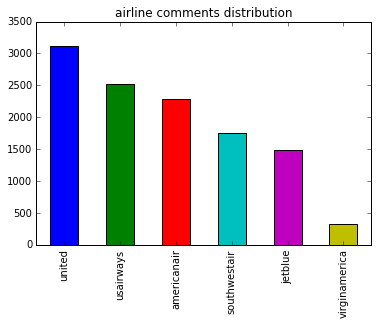

In [406]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure();
fig = dis.plot.bar()
fig.set_title("airline comments distribution")
plt.axhline(0, color='k')
plt.show();

##### Positive comments of the 6 airlines

In [407]:
us_pos = us_df.loc[us_df['sentiment'] == "positive"]
dis_pos = us_pos['airline'].value_counts()
dis_pos[0:6]

southwestair     569
jetblue          542
united           491
americanair      336
usairways        269
virginamerica    152
Name: airline, dtype: int64

##### Negative comments of the 6 airlines

In [408]:
us_neg = us_df.loc[us_df['sentiment'] == "negative"]
dis_neg = us_neg['airline'].value_counts()
dis_neg[0:6]

united           2629
usairways        2256
americanair      1957
southwestair     1186
jetblue           952
virginamerica     181
Name: airline, dtype: int64

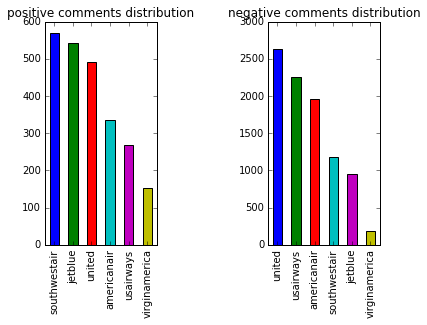

In [409]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure();
plt.subplot(1,2,1)
ax = dis_pos.iloc[0:6].plot.bar()
ax.set_title("positive comments distribution")
plt.subplot(1,2,2)
ax = dis_neg.iloc[0:6].plot.bar()
ax.set_title("negative comments distribution")
plt.axhline(0, color='k')
plt.subplots_adjust(wspace =1, hspace =0)
plt.show();

In [410]:
neg_percentage = dis_neg.iloc[0:6]/dis.iloc[0:6]
neg_percentage

united           0.842628
usairways        0.893465
americanair      0.853467
southwestair     0.675783
jetblue          0.637216
virginamerica    0.543544
Name: airline, dtype: float64

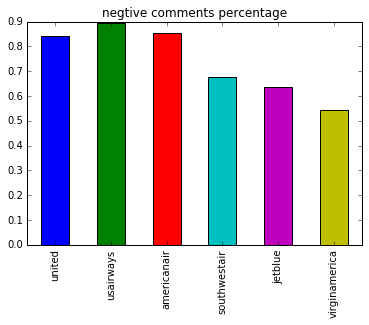

In [411]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure();
# neg_percentage = dis_neg.iloc[0:6]/dis.iloc[0:6]
ax = neg_percentage.plot.bar()
ax.set_title("negtive comments percentage")
plt.axhline(0, color='k')
plt.show();

##### Observation:
* Among all of the airlines, the negative comments are more than positive comments.
* The united airline owns the most comments, the number of which is 3120. It also has the largest amount of negative comments.
* The VirginAmeriaca airline has smallest amount of comments, but the percentage of negative comments is the lowest among the 6 airlines, which is 0.54%.
* The USAirways has the highest percentage of negative comments, which is 0.89%.
* The SouthwestAir has 569 positive comments, which is the most of the 6 airlines.
<br>
<br>
Then we can explore the reason of negtive comments 

In [412]:
# plot = df.plot.pie(subplots=True, figsize=(6, 3))
neg_reason = us_df.loc[us_df['sentiment'] == "negative"]
neg_reason['negative_reason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negative_reason, dtype: int64

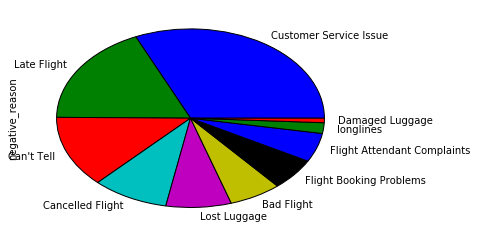

In [413]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure();
neg_reason_dist = neg_reason['negative_reason'].value_counts()
ax = neg_reason_dist.plot.pie(subplots=True, figsize=(5, 5))
plt.show();

##### Observation
* There are ten reasons of negative comments.
* "Customer Service Issue" is the most important reason.


#### 3. Show the aspects of generic tweets and the airline tweets
I will show the negative and positive comments percentage in a pie chart

In [414]:
airline_pos_neg = us_df['sentiment'].value_counts()
df['sentiment'] = df['class'].apply(lambda x: "positive" if x == 4 else "negative")
generic_pos_neg = df['sentiment'].value_counts()

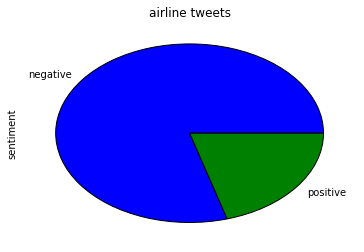

In [415]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure();
airline_pos_neg.plot.pie(subplots=True, figsize=(5, 5))
plt.title("airline tweets")
plt.show();

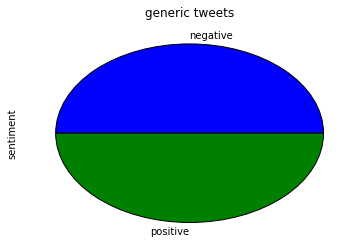

In [416]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure();
ax = generic_pos_neg.plot.pie(subplots=True, figsize=(5, 5))
plt.title("generic tweets")
plt.show();

### Model preparation

* To extract the numerical features from the text contents. I use the CountVectorize to tokenize and count the word occurrences of the text. 

In [417]:
from sklearn.feature_extraction.text import CountVectorizer

In [418]:
vectorizer = CountVectorizer()
vectorizer  

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

* Get the corpus from the tweets.

In [419]:
corpus = df['text'].apply(lambda row: row.strip())

* The size of the X matrix is 200000x14014, which means there are 14014 features extracted from the text.

In [420]:
X = vectorizer.fit_transform(corpus)
X

<200000x140145 sparse matrix of type '<class 'numpy.int64'>'
	with 1260621 stored elements in Compressed Sparse Row format>

* Prepare the target data, I represent positive as 1, negative as -1.
* Use train_test_split to split the data randomly into training set and test set.

In [421]:
y = df['class'].apply(lambda row: -1 if row == 0 else 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

* Import the logistic Regression model and train the model by using the training data.

In [422]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

* The accuracy of predicting the generic tweets test set is 74%

In [423]:
accuracy = classifier.score(X_test, y_test) 
accuracy

0.7422666666666666

### Model implementation 
* Apply the model to the us airline tweets
* The accuracy is 74.6%
<br><br>
* Train a multi-class logistic regression model

In [424]:
us_data = us_df['text'].apply(lambda row: row.strip())
X_us = vectorizer.transform(us_data)
y_us = us_df['sentiment'].apply(lambda row: -1 if row == "negative" else 1)

In [425]:
y_us_predict = classifier.predict(X_us)
# save the predict sentiment to the us_df
us_df['predict_sentiment'] = y_us_predict
# get the prediction accuracy
accuracy_airline = classifier.score(X_us, y_us) 
accuracy_airline

0.7461225197123299

##### Train a multi-class logistic regression model 

In [426]:
# prepare the data
us_df['negative_reason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negative_reason, dtype: int64

#### label encoding
* The flight booking problems and bad flight also belongs to the service issue, so I combine the three reasons.
* I combine the reasons about luggage.
* I combine the reasons about cancelled or late flights.
* From the observation of the tweets, I find the longlines are always caused by the bad work of the attendant, so I combine the 'Flight Attendant Complaints' and 'longlines'.
* There are 5 categories.

In [427]:
def label_encoding(text):
    label_encoding_dict={
        'Customer Service Issue':0,
        'Flight Booking Problems':0,
        'Bad Flight':0,
        'Late Flight':1,
        'Cancelled Flight':1,
        'Lost Luggage':2,
        'Damaged Luggage':2, 
        'Flight Attendant Complaints':3,
        'longlines':3,
        "Can't Tell":4   
    }
    return label_encoding_dict[text]

In [428]:
#label the reason
us_df['negative_label'] = neg_airline_df['negative_reason'].apply(label_encoding)

* The features are the words occurence in the text.
* Vectorize the text and count the occurences of each words.

In [429]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

multiclass_vectorizer = CountVectorizer()
X_airline = multiclass_vectorizer.fit_transform(neg_airline_df['text'])
y_airline = neg_airline_df['negative_label']
#split the data randomly into training set and test set
X_airline_train, X_airline_test, y_airline_train, y_airline_test = train_test_split(X_airline, y_airline, test_size=0.30, random_state=20)

from sklearn.multiclass import OneVsRestClassifier

multiclass_model = OneVsRestClassifier(LogisticRegression())
multiclass_model.fit(X_airline_train, y_airline_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

* test the multi class logistic regression model with the test set.

In [430]:
print('Accuracy:', multiclass_model.score(X_airline_test, y_airline_test))

Accuracy: 0.6826434277414669


### Analysis
* Show the negative and positive sentiment percentage for each airline
* Show the negative reason for each airline
* Discuss the public opinion of the us airlines 2015
united             3120
usairways          2525
americanair        2293
southwestair       1755
jetblue            1494
virginamerica       333

In [431]:
united_tw = us_df.loc[us_df['airline'] == "united"]
usairways_tw = us_df.loc[us_df['airline'] == "usairways"]
americanair_tw = us_df.loc[us_df['airline'] == "americanair"]
southwestair_tw = us_df.loc[us_df['airline'] == "southwestair"]
jetblue_tw = us_df.loc[us_df['airline'] == "jetblue"]
virginamerica_tw = us_df.loc[us_df['airline'] == "virginamerica"]

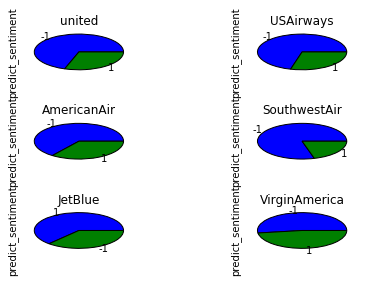

In [432]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure();
plt.subplot(3,2,1)
united_pos_neg = united_tw['predict_sentiment'].value_counts()
ax = united_pos_neg.plot.pie(subplots=True, figsize=(5, 5))
plt.title("united")

plt.subplot(3,2,2)
usairways_pos_neg = usairways_tw['predict_sentiment'].value_counts()
ax = usairways_pos_neg.plot.pie(subplots=True, figsize=(5, 5))
plt.title("USAirways")
plt.subplots_adjust(wspace =1, hspace =1)

plt.subplot(3,2,3)
americanair_pos_neg = americanair_tw['predict_sentiment'].value_counts()
ax = americanair_pos_neg.plot.pie(subplots=True, figsize=(5, 5))
plt.title("AmericanAir")
plt.subplots_adjust(wspace =1, hspace =1)


plt.subplot(3,2,4)
southwestair_pos_neg = southwestair_tw['predict_sentiment'].value_counts()
ax = southwestair_pos_neg.plot.pie(subplots=True, figsize=(5, 5))
plt.title("SouthwestAir")
plt.subplots_adjust(wspace =1, hspace =1)

plt.subplot(3,2,5)
jetblue_pos_neg = jetblue_tw['predict_sentiment'].value_counts()
ax = jetblue_pos_neg.plot.pie(subplots=True, figsize=(5, 5))
plt.title("JetBlue")
plt.subplots_adjust(wspace =1, hspace =1)


plt.subplot(3,2,6)
virginamerica_pos_neg = virginamerica_tw['predict_sentiment'].value_counts()
ax = virginamerica_pos_neg.plot.pie(subplots=True, figsize=(5, 5))
plt.title("VirginAmerica")
plt.subplots_adjust(wspace =1, hspace =1)

plt.show();

In [433]:
#the negative reasons
neg_tw = us_df.loc[us_df['predict_sentiment'] == -1]
neg_reasons = us_df['negative_label'].value_counts()
neg_reasons

0.0    4019
1.0    2512
4.0    1190
2.0     798
3.0     659
Name: negative_label, dtype: int64

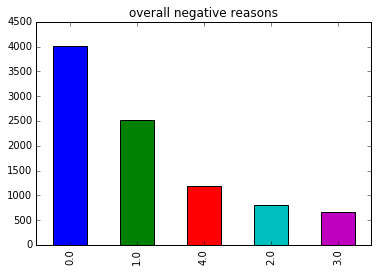

In [434]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure();
neg_reasons.plot.bar()
plt.title("overall negative reasons")
plt.axhline(0, color='k')
plt.show();

 * 0:  'Customer Service Issue','Flight Booking Problems','Bad Flight'
 * 1:  'Late Flight','Cancelled Flight'
 * 2:  'Lost Luggage', 'Damaged Luggage'
 * 3:  'Flight Attendant Complaints','longlines'
 * 4:  'Can't Tell'

##### find the potential reason why united airline get so many positive comments
* Comparing the reasons of united airline with the virgina airline

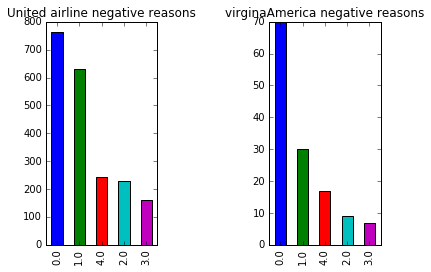

In [435]:
united_tw_neg = united_tw.loc[us_df['predict_sentiment'] == -1]
united_neg_reason = united_tw_neg['negative_label'].value_counts()

virgina_tw_neg = virginamerica_tw.loc[us_df['predict_sentiment'] == -1]
virgina_neg_reason =virgina_tw_neg['negative_label'].value_counts()

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure();
plt.subplot(1,2,1)
united_neg_reason.plot.bar()
plt.title("United airline negative reasons")

plt.subplot(1,2,2)
virgina_neg_reason.plot.bar()
plt.title("virginaAmerica negative reasons")
plt.subplots_adjust(wspace =1, hspace =0)
plt.axhline(0, color='k')
plt.show();

**Question**: What can public opinion on Twitter tell us about the US airlines in 2015?
From the plot above we can see: 
* the overall opinion about the US airlines are negative.
* the USAirways has the most percentage of negative tweets.
* the VirginAmerica has the most percentage of positive tweets.
* the most negative comments reason is customer Service Issue, flight booking problems, and bad flight.
* after comparing the negative reasons of united airline and VirginaAmerica airline, I find that the Virgina airline does well in 'Late Flight' and 'Cancelled Flight'. So in the public opinion, the VirginaAmerica is more reliable on time.

**Questions**: For both models, suggest one way you can improve the accuracy of your models.
* For the first model, I tried to get the score of the text by using the 'corpus.txt', however, I find the score is not enought to show me the relation between the sentiment and the score. So I abandoned the way. But I think if I can find a more reasonble corpus, I can add this feature to the model.
* For the second model, as there are more classes, so I think I can use the bigram method to extract features. 